# Research Skills: Spatiotemporal Data Analysis 
# Worksheet 2 - Fundamentals for Time Series Analysis

Sharon Ong, Department of Cognitive Science and Artificial Intelligence – Tilburg University

Academic Year 2019-2020

In this practicum, the 'statsmodels' package will be used. Please use https://jupyter.uvt.nl if you don't have this package installed on your localhost. 

You will work with three time-series datasets:
1. A time series dataset depicting the total number of female births recording in California, USA during the year of 1959 (daily-total-female-births.csv).
2. The monthly totals of international airline passengers (in thousands) from January 1949 to December 1960 (airline-passengers.csv). 
3. The monthly atmospheric CO2 concentrations (ppm) derived from in situ air measurements on Mount Loa, USA (part of the statsmodel package) 

The Entry Level exercises include 

* White noise, 
* Random walk, 
* Stationarity,
* Decomposing a time-series.
* Removing Trends 

The Advancde Level exercises incldue 
* Finding Periods in the Time and Frequency Domain 

## 1.  White Noise 
Let's generate some white noise and explore the statistics.
1. Generate 1000 random normal returns using np.random.normal() with mean of 0 and standard deviation (scale) of 1, where the argument for the mean is loc and the argument for the standard deviation is scale.
    np.random.normal(loc = 0, scale = 1, size = 1000)  
2. Verify the mean and standard deviation of returns using np.mean() and np.std() 
3. Convert to the numpy array to a pandas Series (white_noise_series = pd.Series(white_noise)) 
4. Plot the time series.
5. Compute the autocorrelation; using acf from statsmodels
5. Plot the autocorrelation function using autocorrelation_plot 

Mean:  0.057459277244730815
Standard Deviation:  1.051806131216554


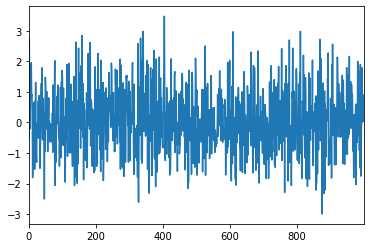

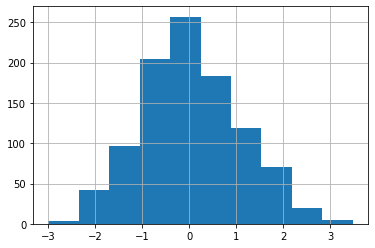

[ 1.          0.01579353 -0.0093428   0.01876668 -0.03790085 -0.02646078
  0.01885883 -0.0564848  -0.01823995 -0.03260359  0.02276832  0.04454674
 -0.07704669 -0.03597409 -0.0366286  -0.01122787 -0.01065406 -0.01463748
 -0.01136139 -0.02645992  0.05305192  0.00157882  0.01510492  0.03500308
  0.02489883 -0.02867142 -0.08223258  0.03247928  0.03645506 -0.01772551
  0.03295591  0.03774916 -0.00132427  0.08056985  0.00205318 -0.00438551
 -0.05933765 -0.04238105  0.00795867  0.02200622 -0.02059086]
-0.00937648830740598


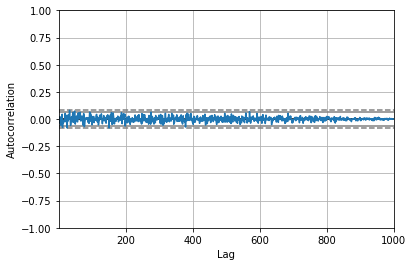

In [2]:
import pandas as pd 
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np 

# 1 
white_noise = np.random.normal(loc = 0, scale = 1, size = 1000) 

# 2
print("Mean: ",white_noise.mean())
print("Standard Deviation: ",white_noise.std())


# 3
white_noise = pd.Series(white_noise)
white_noise.describe()

#4 
white_noise.plot()
plt.show()
# histogram plot
white_noise.hist()
plt.show()
#5
# autocorrelation
print(acf(white_noise))
print(white_noise.autocorr(lag=2))  
#6 
autocorrelation_plot(white_noise)
plt.show()

## 2. Random Walk 
Below is code which generates a random walk. 
1. Plot the time series 
2. Compute the autocorrelation. Display the autocorelleation in a plot. How does the autocorrelation of a random walk compare to one of white noise. 

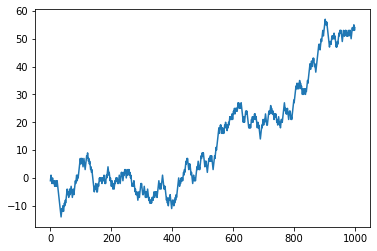

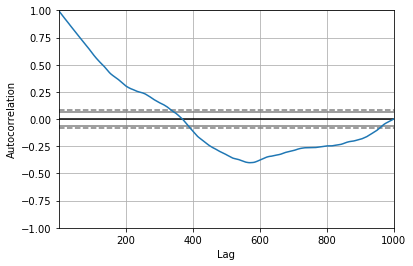

In [3]:
from random import seed
from random import random
import matplotlib.pyplot as plt
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
#
# Your code goes here 
#1 
plt.plot(random_walk)
plt.show()

#2 
plt.figure()
autocorrelation_plot(random_walk)
plt.show()

## 3. Decomposing a Time Series 
The components of a time series are trend, seasonality, base level and residual (noise). A time series can be decomposed with the function 'res = seasonal_decompose(series, model='additive')' or  'res = seasonal_decompose(series, model='multiplicative')'.

Decompose two datasets 

A. The total female births in California in 1959 (daily-total-female-births.csv) and 

B. The monthly totals of international airline passengers (airline-passengers.csv). 

Plot the results of the decomposition (res.plot()) 

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64


<Figure size 432x288 with 0 Axes>

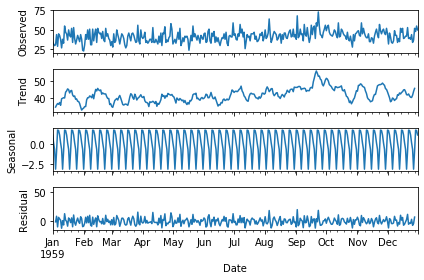

<Figure size 432x288 with 0 Axes>

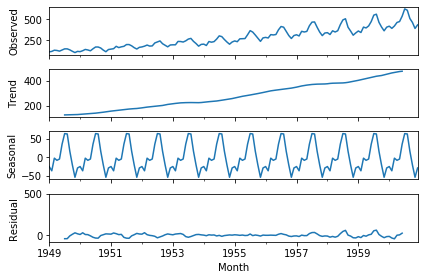

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())
plt.figure(1)
result = seasonal_decompose(series, model='additive')
result.plot()

plt.figure(2)
plt.plot(result.seasonal)
plt.plot(result.trend)

series = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())
plt.figure(3)
result = seasonal_decompose(series, model='additive')
result.plot()

plt.figure(4)
plt.plot(result.seasonal)
plt.plot(result.trend)
plt.show()
#
# Your code goes here 
#

## 4. Stationarity 

The observations in a stationary time series are not dependent on time. Time series are stationary if they do not have trend or seasonal effects. The summary statistics of a stationary time series are consistent over time. Time series that are stationary are easier to model.

We will explore two datasets to test for stationarity; 
A. The total female births in California in 1959 (daily-total-female-births.csv) and 
B. The monthly totals of international airline passengers (airline-passengers.csv).  

For each dataset
1. Load the dataset with pandas 
2. Plot a histogram of the observations (use the .hist() function). For dataset A, it's the 'Births' column. For dataset B, take the 'Passengers' column.  Calculate the overall mean and variance. 
3. Split the time series into two contiguous sequences. Calculate the mean and variance of each group of numbers and compare the value.
4. Plot the autocorrelation. Which of these two datasets are stationary? 

Births    41.980822
dtype: float64
Births    53.996884
dtype: float64
[ 1.          0.21724118  0.15287758  0.10821254  0.09066059  0.09595481
  0.09104012  0.19508071  0.14115295  0.06117859  0.04781522  0.04770662
 -0.01964707  0.02287422  0.08112657  0.11185686  0.07333732  0.01501845
  0.07270333  0.06859     0.09280107  0.26386846  0.14012147  0.06070286
  0.08716232  0.05038825  0.0650489   0.11466565  0.1552232   0.12850638
  0.10358981  0.09734643  0.04912286  0.04022798  0.05838555  0.05359812
  0.10151053  0.08268663  0.0912185   0.11192192  0.05652846]
41.98082191780822
39.76373626373626
44.185792349726775


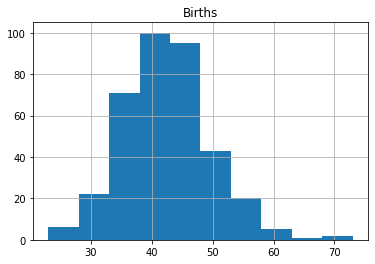

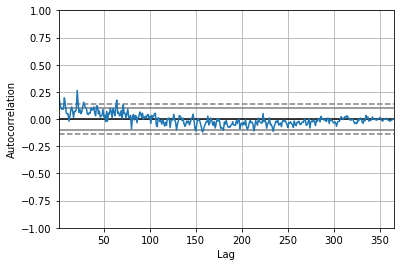

In [9]:
data1 = pd.read_csv("daily-total-female-births.csv") 

data1.hist()
print(data1.mean())
print(data1.var())
print(acf(data1['Births']))
#print(data1['Births'].autocorr(lag=30)) 

plt.figure()
autocorrelation_plot(data1['Births'])

X = data1['Births'].values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]    
print(X.mean())
print(X1.mean())
print(X2.mean())

280.2986111111111
14391.917200854701
[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376 0.48248203 0.51712699
 0.53218983 0.49397569 0.43772134 0.3876029  0.34802503 0.31498388
 0.28849682 0.27080187 0.26429011 0.27679934 0.2985215  0.32558712
 0.3370236  0.30333486 0.25397708 0.21065534 0.17217092]
280.2986111111111
182.90277777777777
377.69444444444446


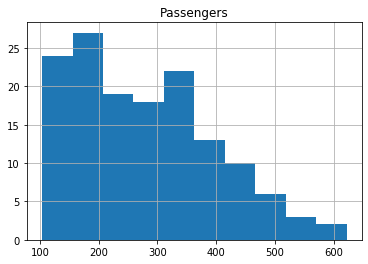

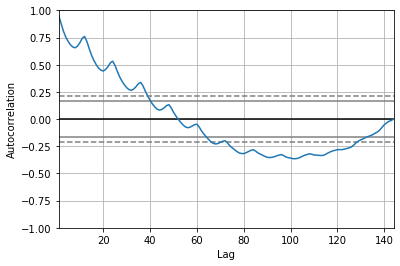

In [12]:
data2 = pd.read_csv("airline-passengers.csv") 

data2.hist()
print(data2['Passengers'].mean())
print(data2['Passengers'].var())
print(acf(data2['Passengers']))
#print(data1['Births'].autocorr(lag=30)) 

plt.figure()
autocorrelation_plot(data2['Passengers'])

X = data2['Passengers'].values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]    
print(X.mean())
print(X1.mean())
print(X2.mean())

## 5. Removing trends
There are many ways to remove trends (without callingthe seasonal_decompose function). Let's explore two methods
1. Detrend by Differencing
2. Detrend by Linear Regression 

We will use the Mount Loa Dataset.  The code below loads the Mount Loa dataset and applies two detrending methods.  

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm
# 
dta = sm.datasets.co2.load_pandas().data
# deal with missing values. see issue
dta.co2.interpolate(inplace=True)

X = dta.co2.values

diff = list()

for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

plt.plot(diff)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

res = dta.co2.values
X = [i for i in range(0, len(res))]
X = np.reshape(X, (len(X), 1))
y = res #np.log(res)



model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend


plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(res))]
# plot detrended
plt.plot(detrended)
plt.show()

# Advanced Level 

## 6. Periodograms vs Autocorrelation plots 
The code below generates a timeseries dataset which combines two sine waves at two frequencies (30.0 and 80.00) 

1. Plot x vs y
2. Find the periodgram (f, Pxx_den = signal.periodogram(y, fs))
3. Plot f vs Pxx_den. Do you see the two frequencies)
4. Plot the autocorrelation. How well can you see the two frequencies 

(600,)


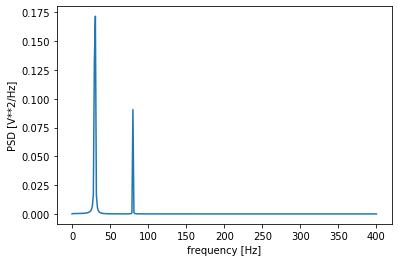

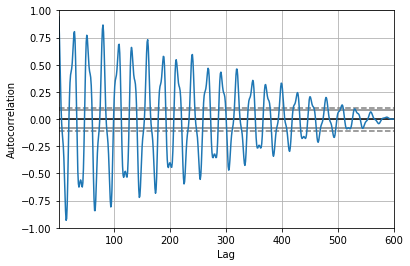

In [14]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
%matplotlib inline 

# Number of sample points
N = 600
fs = 800.0
# sample spacing
T = 1.0 /fs
# create 1D dataset of two sine waves at w1 = 30.0 and w2 = 80.0 
x = np.linspace(0.0, N*T, N) 
print(x.shape)
y = np.sin(30.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

f, Pxx_den = signal.periodogram(y, fs)
#
# Your code goes here 
#
fs = 800

f, Pxx_den = signal.periodogram(y, fs)
#plt.semilogy(f, Pxx_den)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


plt.figure()
autocorrelation_plot(y)


Decompose the Mount Loa Dataset. Plot the autocorrelation and periodogram for the seasonal information (.seasonal) 

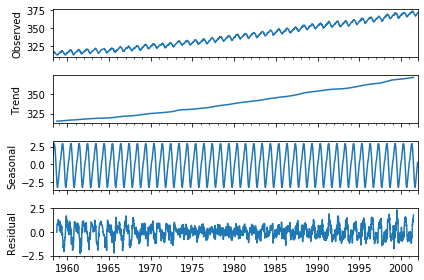

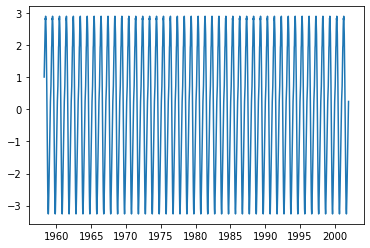

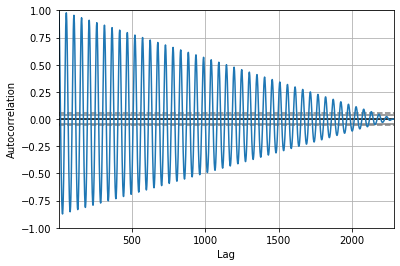

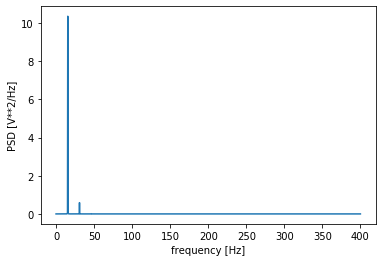

In [16]:
import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.co2.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(dta.co2, model='additive')
res.plot()
#
# Your code goes here 
#
plt.figure()
plt.plot(res.seasonal)

plt.figure()
autocorrelation_plot(res.seasonal)

fs = 800

plt.figure()
f, Pxx_den = signal.periodogram(res.seasonal, fs)
#plt.semilogy(f, Pxx_den)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()



Write code to find the periodograms from scratch. You can use the fft function in the scipy package. 

(600,)


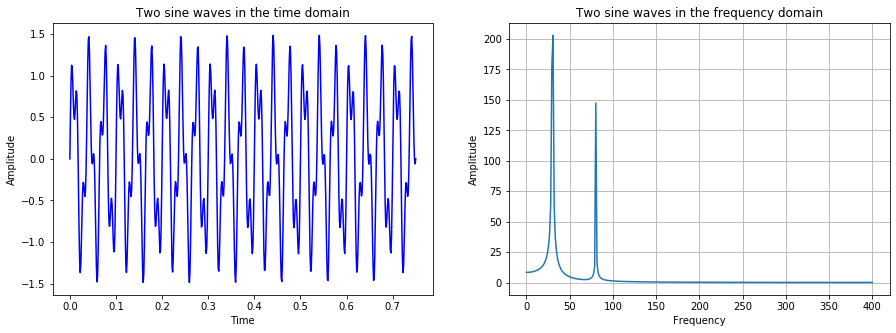

In [13]:
#
# Your code goes here 
#
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

# Number of sample points
N = 600
# sample spacing
T = 1.0 /800.0
# create 1D dataset of two sine waves at w1 = 30.0 and w2 = 80.0 
x = np.linspace(0.0, N*T, N) 
print(x.shape)
y = np.sin(30.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)
# retain the magnitude and keep only the first half of the points 
yf = np.abs(yf[0:N//2]) #np.abs(yf[0:N//2])
#yf = np.abs(yf)
# prepare frequency data for plotting 
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#xf = np.linspace(0.0, 1.0/(1.0*T),N)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(x, y,'b-')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Two sine waves in the time domain')
plt.subplot(1,2,2)
plt.plot(xf,yf)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Two sine waves in the frequency domain')
plt.grid()
plt.show()